In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

seed = 5885
rng = np.random.default_rng(seed)

# rng.uniform(size = 4*6)

In [10]:
#assigns location and velocity
def loc_vel_assigner(Natoms):
    color_array = []
    Atoms = np.zeros(Natoms)
    apos = np.zeros((Natoms,3))
    p = np.zeros((Natoms,3))
    for i in range(Natoms):
        Atoms[i] = i
        x = np.random.normal(loc = 0.0, scale = 2*Rbeam)
        y = np.random.normal(loc = 0.0, scale = Rbeam)
        z = np.random.normal(loc = 0.0, scale = Rbeam)
        #Half of the atoms are in one side and assigned blue color
        if Atoms[i] < Natoms/2: 
            color_array.append('b')
            apos[i] = np.array([x-L,y,z])
            px = 1
            py = 0
            pz = 0
            p[i] =  np.array([px,py,pz])
        #other half in another side with red color
        else:
            color_array.append('r')
            apos[i] = np.array([x+L,y,z])
            px = -1
            py = 0
            pz = 0
            p[i] =  np.array([px,py,pz])
    return Atoms, apos, p, color_array

#to check collisions
def checkCollisions(apos,Natoms,Ratom):
    hitlist = []
    r2 = 2*Ratom
    for i in range(Natoms):
        ai = apos[i]
        for j in range(i) :
            aj = apos[j]
            dr = ai - aj
            if np.linalg.norm(dr) < r2: hitlist.append([i,j])
    return np.array(hitlist)

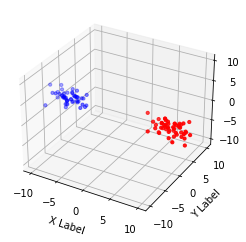

['b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b'
 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b'
 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r']
Solve took 1.94143 seconds


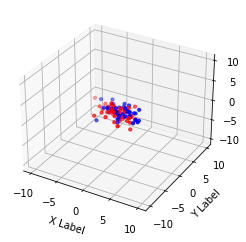

[array([-5.21815131,  1.08909026,  1.12104475]), array([-5.21815131,  1.08909026,  1.12104475]), array([-5.21815131,  1.08909026,  1.12104475]), array([-5.21815131,  1.08909026,  1.12104475]), array([-5.21815131,  1.08909026,  1.12104475]), array([-5.21815131,  1.08909026,  1.12104475]), array([-5.21815131,  1.08909026,  1.12104475]), array([-5.21815131,  1.08909026,  1.12104475]), array([-5.21815131,  1.08909026,  1.12104475]), array([-5.21815131,  1.08909026,  1.12104475]), array([-5.21815131,  1.08909026,  1.12104475]), array([-5.21815131,  1.08909026,  1.12104475]), array([-5.21815131,  1.08909026,  1.12104475]), array([-5.21815131,  1.08909026,  1.12104475]), array([-5.21815131,  1.08909026,  1.12104475]), array([-5.21815131,  1.08909026,  1.12104475]), array([-5.21815131,  1.08909026,  1.12104475]), array([-5.21815131,  1.08909026,  1.12104475]), array([-5.21815131,  1.08909026,  1.12104475]), array([-5.21815131,  1.08909026,  1.12104475]), array([-5.21815131,  1.08909026,  1.121

In [11]:
t0 = time.time()
Natoms = 100

Rbeam = 1
L = 10

# mass = (4/6)*10**(-26) # helium mass
mass = 1
Ratom = 0.1 # wildly exaggerated size of helium atom
# dt = 10**(-5)
dt = 0.1

Atoms, apos, p, color_array = loc_vel_assigner(Natoms)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(apos[:,0], apos[:,1], apos[:,2], marker='o', color = color_array, s = Ratom*10**2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.axes.set_xlim3d(left = -(L+Rbeam), right = (L+Rbeam)) 
ax.axes.set_ylim3d(bottom = -(L+Rbeam), top = (L+Rbeam))
ax.axes.set_zlim3d(bottom = -(L+Rbeam), top = (L+Rbeam))
plt.show()
    
#Delete the particles that where colidining since the begining
hitlist = checkCollisions(apos,Natoms,Ratom)

apos = np.delete(apos, hitlist[:,0], 0) 
color_array = np.delete(color_array, hitlist[:,0]) 
p = np.delete(p, hitlist[:,0], 0) 
Natoms = Natoms-len(hitlist)

particle_track = np.array([])
particle_trajectory = []


for t in range(100):
    for i in range(Natoms): 
        apos[i] = apos[i] + (p[i]/mass)*dt
    c = 0
    for index in particle_track:
        particle_trajectory[c].append(apos[int(index)])
        c = c + 1        
    # Check for collisions
    hitlist = checkCollisions(apos,Natoms,Ratom)
    # If any collisions took place, update momenta of the two atoms
    for ij in hitlist:
        i = ij[0]
        j = ij[1]

        particle_track = np.append(particle_track, i)
        particle_track = np.append(particle_track, j)
        particle_trajectory.append([apos[i]])
        particle_trajectory.append([apos[j]])
        
        ptot = p[i]+p[j]
        posi = apos[i]
        posj = apos[j]
        vi = p[i]/mass
        vj = p[j]/mass
        vrel = vj-vi
        a = np.linalg.norm(vrel)**2
        if a == 0: continue;  # exactly same velocities
        rrel = posi-posj
        if np.linalg.norm(rrel) > Ratom: continue # one atom went all the way through another
        # theta is the angle between vrel and rrel:
        dx = np.dot(rrel, vrel/np.linalg.norm(vrel))       # rrel.mag*cos(theta)
        dy = np.linalg.norm(np.cross(rrel, vrel/np.linalg.norm(vrel))) # rrel.mag*sin(theta)
        # alpha is the angle of the triangle composed of rrel, path of atom j, and a line
        #   from the center of atom i to the center of atom j where atome j hits atom i:
        alpha = np.arcsin(dy/(2*Ratom)) 
        d = (2*Ratom)*np.cos(alpha)-dx # distance traveled into the atom from first contact
        deltat = d/np.linalg.norm(vrel)         # time spent moving from first contact to position inside atom
        posi = posi-vi*deltat # back up to contact configuration
        posj = posj-vj*deltat
        mtot = 2*mass
        pcmi = p[i]-ptot*mass/mtot # transform momenta to cm frame
        pcmj = p[j]-ptot*mass/mtot
        rrel = vrel/np.linalg.norm(rrel)
        pcmi = pcmi-2*np.dot(pcmi, rrel)*rrel # bounce in cm frame
        pcmj = pcmj-2*np.dot(pcmj, rrel)*rrel
        p[i] = pcmi+ptot*mass/mtot # transform momenta back to lab frame
        p[j] = pcmj+ptot*mass/mtot
        apos[i] = posi+(p[i]/mass)*deltat # move forward deltat in time
        apos[j] = posj+(p[j]/mass)*deltat
        color_array[i] = 'm'
        color_array[j] = 'yellow'
        print('change!', ij)
print(color_array)
print('Solve took %lg seconds' % (time.time()-t0,))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(apos[:,0], apos[:,1], apos[:,2], marker='o', color = color_array, s = Ratom*10**2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.axes.set_xlim3d(left = -(L+Rbeam), right = (L+Rbeam)) 
ax.axes.set_ylim3d(bottom = -(L+Rbeam), top = (L+Rbeam))
ax.axes.set_zlim3d(bottom = -(L+Rbeam), top = (L+Rbeam))
plt.show()

print(particle_trajectory[0])

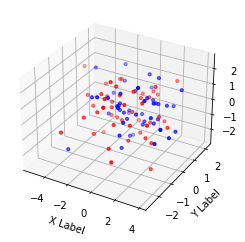

[-0.4119794   0.78463879  0.67602526] [-0.40573971  1.39540445  0.08422269]


In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(apos[:,0], apos[:,1], apos[:,2], marker='o', color = color_array, s = Ratom*10**2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

print(apos[46], apos[54])


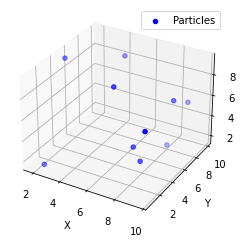

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def initialize_particles(num_particles):
    positions = np.random.rand(num_particles, 3) * 10  # Random initial positions within a 10x10x10 cube
    velocities = np.random.rand(num_particles, 3) - 0.5  # Random initial velocities between -0.5 and 0.5
    charges = np.random.choice([-1, 1], num_particles)  # Random charges (-1 or 1)
    return positions, velocities, charges

def lorentz_force(q, v, B):
    return q * np.cross(v, B)

def update_particle(position, velocity, charge, dt, B):
    force = lorentz_force(charge, velocity, B)
    acceleration = force  # Assuming mass = 1
    velocity += acceleration * dt
    position += velocity * dt
    return position, velocity

def update(frame):
    ax.clear()
    for i in range(len(positions)):
        positions[i], velocities[i] = update_particle(positions[i], velocities[i], charges[i], dt, B)

    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='b', marker='o', label='Particles')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

# Main simulation
num_particles = 10
positions, velocities, charges = initialize_particles(num_particles)
B = np.array([0, 0, 1])  # Example magnetic field vector (adjust as needed)
dt = 0.1  # Time step

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ani = FuncAnimation(fig, update, frames=100, interval=50, repeat=False)

# Save the animation or display it using plt.show()
# ani.save('particle_animation.gif', writer='imagemagick')
# plt.show()

# Display the animation using HTML
HTML(ani.to_jshtml())


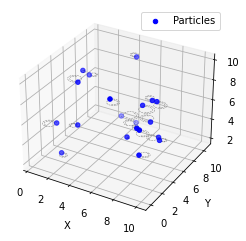

In [33]:
#code to show the particles with trajectory
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def initialize_particles(num_particles):
    positions = np.random.rand(num_particles, 3) * 10  # Random initial positions within a 10x10x10 cube
    velocities = np.random.rand(num_particles, 3) - 0.5  # Random initial velocities between -0.5 and 0.5
    velocities[:, 1:] = 0  # Set y and z components to zero for velocity along x-axis
    charges = np.random.choice([-1, 1], num_particles)  # Random charges (-1 or 1)
    return positions, velocities, charges

def lorentz_force(q, v, B):
    return q * np.cross(v, B)

def update_particle(position, velocity, charge, dt, B):
    force = lorentz_force(charge, velocity, B)
    acceleration = force  # Assuming mass = 1
    velocity += acceleration * dt
    position += velocity * dt
    return position, velocity

#plotting the trajectory
def update(frame):
    ax.clear()
    for i in range(len(positions)):
        positions[i], velocities[i] = update_particle(positions[i], velocities[i], charges[i], dt, B)
        trajectories[i].append(positions[i].copy())  # Store the trajectory points

    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='b', marker='o', label='Particles')
    for traj in trajectories:
        traj_array = np.array(traj)
        ax.plot(traj_array[:, 0], traj_array[:, 1], traj_array[:, 2], c='gray', linestyle='dashed', linewidth=0.5)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

# Main simulation
num_particles = 20
positions, velocities, charges = initialize_particles(num_particles)
B = np.array([0, 0, 1])  # Example magnetic field vector (adjust as needed)
dt = 0.1  # Time step

trajectories = [[] for _ in range(num_particles)]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ani = FuncAnimation(fig, update, frames=100, interval=50, repeat=False)

# Display the animation using HTML
HTML(ani.to_jshtml())
